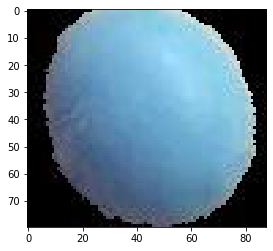

In [265]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/Aluno1/Desktop/SementesCnn/"
CATEGORIES = ["Naogerminou", "Germinou"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img)) 
        plt.imshow(img_array,cmap="gray") 
        plt.show() 

        break  
    break  


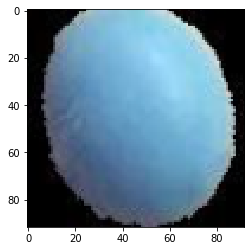

In [266]:
IMG_SIZE = 92

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

# Preparando a basa para treino


In [267]:
training_data  =  [] 

def create_training_data():
    for category in CATEGORIES:   
        # cria caminho para germinou e naogerminou 
        path = os.path.join(DATADIR,category)  
        # obtém a classificação (0 ou 1). 0 = Não germinou 1 = Germinou 
        class_num = CATEGORIES.index(category)  

         # itere sobre cada imagem por 
        for img in os.listdir(path):  
            try:
                # convertido a matriz 
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                # redimensione para normalizar o tamanho dos dados 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                 # adicione isso aos nossos dados de treinamento, 
                training_data.append([new_array, class_num]) 
                 # no interesse em manter a saída limpa ... 
            except Exception as e: 
                pass
         

create_training_data()

print(len(training_data))

10772


# embaralhar os dados

No momento, nossos dados são apenas todos os cães, depois todos os gatos. Isso geralmente acabará causando problemas também, pois, inicialmente, o classificador aprenderá a prever sempre os cães. Então ele mudará para oh, apenas preveja todos os gatos! Indo e voltando assim também não é bom.

In [268]:
import random

random.shuffle(training_data)

Nossa training_dataé uma lista, o que significa que é mutável, por isso agora está bem embaralhada. Podemos confirmar isso repetindo algumas das amostras iniciais e imprimindo a classe.

In [269]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
1
0
1
1
1
0


Ótimo, nós temos os exemplos bem misturadas! Hora de fazer o nosso modelo!



In [270]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [271]:
print(y.size)

10772


Salvando os dados, para que não precisemos continuar calculando-os sempre que quisermos usar  o modelo de rede neural:



In [272]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Sempre podemos carregá-lo em nosso script atual, ou um totalmente novo, fazendo:



In [273]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)




Agora que obtivemos o conjunto de dados, estamos prontos para cobrir redes neurais convolucionais e implementar com nossos dados para classificação.

In [274]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from  tensorflow.keras.callbacks  import  TensorBoard
import time
import pickle

NAME = "germinou-vs-naogerminou-CNN-64x2-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="logs\\{}".format(NAME))


gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


In [275]:




pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
b = pickle.load(pickle_in)
y = np.array(b)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))



model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1,  callbacks=[ tensorboard])
model.save('64x3-CNN.model')

Train on 9694 samples, validate on 1078 samples
Epoch 1/5
9694/9694 [==============================] - 115s 12ms/sample - loss: 0.6832 - acc: 0.5525 - val_loss: 0.6834 - val_acc: 0.5622
Epoch 2/5
9694/9694 [==============================] - 112s 12ms/sample - loss: 0.6712 - acc: 0.5724 - val_loss: 0.6847 - val_acc: 0.5380
Epoch 3/5
9694/9694 [==============================] - 112s 12ms/sample - loss: 0.6661 - acc: 0.5794 - val_loss: 0.6793 - val_acc: 0.5649
Epoch 4/5
9694/9694 [==============================] - 112s 12ms/sample - loss: 0.6557 - acc: 0.5982 - val_loss: 0.6668 - val_acc: 0.6150
Epoch 5/5
9694/9694 [==============================] - 112s 12ms/sample - loss: 0.6377 - acc: 0.6299 - val_loss: 0.6446 - val_acc: 0.6317


In [276]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 2636), started 3 days, 2:26:45 ago. (Use '!kill 2636' to kill it.)

In [280]:
CATEGORIES = ["Naogerminou","Germinou"]


def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (92, 92))
    return new_array.reshape(-1, 92, 92, 1)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('C:/Users/Aluno1/Desktop/SementesCnn/Validacao/Naogerminou/3.jpg')])
print(prediction[0][0])  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])
   

1.0
Germinou
